In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Drop irrelevant column 'id'. 

In [5]:
df = df.drop('id',axis=1)

We are planning to use MinMaxScaler for scaling. This scaling converts maximum value to 1 and minimum to 0 and distribute the values. Column 'zipcode' is not suitable to be applied to this scaler so we will drop it. 

In [6]:
df = df.drop('zipcode', axis = 1)

Check the columns with null values.

In [7]:
df.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [8]:
df.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [9]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

We cannot find the strong correlation with the price for those columns because they have more than 80% of the rows with same value. Therefore, we will drop the columns above.

In [10]:
df = df.drop(columns=['waterfront', 'view', 'yr_renovated'])

## Feature Engineering

In [11]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,47.6168,-122.045,1800,7503


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(7), object(4)
memory usage: 2.6+ MB


Lets deal with the columns with object data type and convert them into int64 or float64 to pass it into keras model. Columns we will make a change are:
- date
- condition
- grade
- sqft_basement

Convert column 'date' into new columns 'month' and 'year'. After creating new columns, 'date' column is not needed so it can be dropped.

In [13]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
df = df.drop('date',axis=1)

Columns 'condition' and 'grade' has object entries. We will create the dictionary listing the original entries and the number entries that corresponds to the original entries. Then, we will replace the values in that column using the dictionary we created.

In [14]:
df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [15]:
condition_replace = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
df["condition"].replace(condition_replace, inplace=True)

In [16]:
df.grade.value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [17]:
grade_replace = {'3 Poor': 3, '4 Low': 4, '5 Fair': 5, '6 Low Average': 6, 
                 '7 Average': 7, '8 Good': 8, '9 Better': 9 ,'10 Very Good': 10, 
                 '11 Excellent':11, '12 Luxury': 12, '13 Mansion': 13}
df["grade"].replace(grade_replace, inplace=True)

Lastly, we will convert the data type of 'sqft basement' into int64 or float64. Lets first check the values.

In [18]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2580.0        1
862.0         1
506.0         1
1960.0        1
2810.0        1
Name: sqft_basement, Length: 304, dtype: int64

There is a value '?' which will prevent us from converting the data type. We will replace the '?' to 0 and then convert the data type.

In [19]:
df['sqft_basement'].replace({'?': 0},inplace = True)

In [20]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

Lets check if every change has been made properly.

In [21]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,2,2015


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   condition      21597 non-null  int64  
 7   grade          21597 non-null  int64  
 8   sqft_above     21597 non-null  int64  
 9   sqft_basement  21597 non-null  float64
 10  yr_built       21597 non-null  int64  
 11  lat            21597 non-null  float64
 12  long           21597 non-null  float64
 13  sqft_living15  21597 non-null  int64  
 14  sqft_lot15     21597 non-null  int64  
 15  month          21597 non-null  int64  
 16  year           21597 non-null  int64  
dtypes: float64(6), int64(11)
memory usage: 2.8 MB


GOOD! Now we have everything set. We will move on to next step.

# Train Test Split and Scaling

## Train Test Split

We will first set the X and y. y will be our target variable and the X will be the rest. In my phase 2 project from flatiron school, 'price' was our target object. Therefore, we will set 'price' as a target.

In [23]:
X = df.drop('price',axis=1)
y = df['price']

We will use the train test split from the scikit learn library. to split the X and y into train set and test set.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 

## Scaling

Lets use MinMaxScaler from sklearn library to scale the X_train and X_test.

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

For scaling, fit applies only for train set while transform applies to both.

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

In [31]:
X_val = scaler.transform(X_val)

In [32]:
X_train.shape

(11337, 16)

In [33]:
X_test.shape

(6480, 16)

In [34]:
X_val.shape

(3780, 16)

# Modeling

We will create a model using keras from tensorflow library.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [36]:
def modeling():
    model = Sequential()
    model.add(Input(shape = (16,))) 
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(1))             
    model.compile(optimizer='adam',loss='mean_squared_error') 
    return model

In [40]:
model = modeling()

In [41]:
model.fit(X_train, y_train.values,
          validation_data=(X_val,y_val.values),
          epochs=500, batch_size=100)

Epoch 1/500
114/114 [==============================] - 0s 2ms/step - loss: 430355513344.0000 - val_loss: 427944312832.0000
Epoch 2/500
114/114 [==============================] - 0s 808us/step - loss: 430335590400.0000 - val_loss: 427904073728.0000
Epoch 3/500
114/114 [==============================] - 0s 1ms/step - loss: 430263140352.0000 - val_loss: 427792203776.0000
Epoch 4/500
114/114 [==============================] - 0s 799us/step - loss: 430102872064.0000 - val_loss: 427575541760.0000
Epoch 5/500
114/114 [==============================] - 0s 1ms/step - loss: 429820674048.0000 - val_loss: 427215781888.0000
Epoch 6/500
114/114 [==============================] - 0s 1ms/step - loss: 429375225856.0000 - val_loss: 426677141504.0000
Epoch 7/500
114/114 [==============================] - 0s 878us/step - loss: 428739330048.0000 - val_loss: 425936977920.0000
Epoch 8/500
114/114 [==============================] - 0s 878us/step - loss: 427894439936.0000 - val_loss: 424974483456.0000
Epoch 9/

114/114 [==============================] - 0s 817us/step - loss: 117922603008.0000 - val_loss: 113445527552.0000
Epoch 67/500
114/114 [==============================] - 0s 781us/step - loss: 115809820672.0000 - val_loss: 111482232832.0000
Epoch 68/500
114/114 [==============================] - 0s 799us/step - loss: 113942929408.0000 - val_loss: 109744078848.0000
Epoch 69/500
114/114 [==============================] - 0s 808us/step - loss: 112341991424.0000 - val_loss: 108239372288.0000
Epoch 70/500
114/114 [==============================] - 0s 781us/step - loss: 110975803392.0000 - val_loss: 106972995584.0000
Epoch 71/500
114/114 [==============================] - 0s 781us/step - loss: 109812539392.0000 - val_loss: 105931259904.0000
Epoch 72/500
114/114 [==============================] - 0s 755us/step - loss: 108837519360.0000 - val_loss: 105033162752.0000
Epoch 73/500
114/114 [==============================] - 0s 773us/step - loss: 108037562368.0000 - val_loss: 104307957760.0000
Epoch

114/114 [==============================] - 0s 825us/step - loss: 95544385536.0000 - val_loss: 92061286400.0000
Epoch 132/500
114/114 [==============================] - 0s 781us/step - loss: 95332573184.0000 - val_loss: 91849187328.0000
Epoch 133/500
114/114 [==============================] - 0s 781us/step - loss: 95120711680.0000 - val_loss: 91639111680.0000
Epoch 134/500
114/114 [==============================] - 0s 799us/step - loss: 94914863104.0000 - val_loss: 91431026688.0000
Epoch 135/500
114/114 [==============================] - 0s 799us/step - loss: 94700773376.0000 - val_loss: 91218386944.0000
Epoch 136/500
114/114 [==============================] - 0s 764us/step - loss: 94489354240.0000 - val_loss: 91004764160.0000
Epoch 137/500
114/114 [==============================] - 0s 790us/step - loss: 94275125248.0000 - val_loss: 90790674432.0000
Epoch 138/500
114/114 [==============================] - 0s 799us/step - loss: 94063443968.0000 - val_loss: 90576297984.0000
Epoch 139/500


114/114 [==============================] - 0s 817us/step - loss: 80895148032.0000 - val_loss: 77389725696.0000
Epoch 197/500
114/114 [==============================] - 0s 790us/step - loss: 80657121280.0000 - val_loss: 77152706560.0000
Epoch 198/500
114/114 [==============================] - 0s 799us/step - loss: 80417980416.0000 - val_loss: 76911353856.0000
Epoch 199/500
114/114 [==============================] - 0s 834us/step - loss: 80181256192.0000 - val_loss: 76671959040.0000
Epoch 200/500
114/114 [==============================] - 0s 799us/step - loss: 79940960256.0000 - val_loss: 76432941056.0000
Epoch 201/500
114/114 [==============================] - 0s 781us/step - loss: 79698681856.0000 - val_loss: 76192989184.0000
Epoch 202/500
114/114 [==============================] - 0s 799us/step - loss: 79460679680.0000 - val_loss: 75951333376.0000
Epoch 203/500
114/114 [==============================] - 0s 799us/step - loss: 79218401280.0000 - val_loss: 75711717376.0000
Epoch 204/500


114/114 [==============================] - 0s 817us/step - loss: 65078886400.0000 - val_loss: 61596262400.0000
Epoch 262/500
114/114 [==============================] - 0s 773us/step - loss: 64856944640.0000 - val_loss: 61369565184.0000
Epoch 263/500
114/114 [==============================] - 0s 764us/step - loss: 64625385472.0000 - val_loss: 61146046464.0000
Epoch 264/500
114/114 [==============================] - 0s 799us/step - loss: 64403709952.0000 - val_loss: 60923527168.0000
Epoch 265/500
114/114 [==============================] - 0s 781us/step - loss: 64178954240.0000 - val_loss: 60703055872.0000
Epoch 266/500
114/114 [==============================] - 0s 790us/step - loss: 63958740992.0000 - val_loss: 60485079040.0000
Epoch 267/500
114/114 [==============================] - 0s 764us/step - loss: 63739899904.0000 - val_loss: 60268576768.0000
Epoch 268/500
114/114 [==============================] - 0s 777us/step - loss: 63522402304.0000 - val_loss: 60052144128.0000
Epoch 269/500


114/114 [==============================] - 0s 755us/step - loss: 54794817536.0000 - val_loss: 51541721088.0000
Epoch 327/500
114/114 [==============================] - 0s 773us/step - loss: 54711590912.0000 - val_loss: 51461595136.0000
Epoch 328/500
114/114 [==============================] - 0s 781us/step - loss: 54630268928.0000 - val_loss: 51382390784.0000
Epoch 329/500
114/114 [==============================] - 0s 790us/step - loss: 54547628032.0000 - val_loss: 51304386560.0000
Epoch 330/500
114/114 [==============================] - 0s 781us/step - loss: 54472581120.0000 - val_loss: 51228995584.0000
Epoch 331/500
114/114 [==============================] - 0s 790us/step - loss: 54392487936.0000 - val_loss: 51152035840.0000
Epoch 332/500
114/114 [==============================] - 0s 790us/step - loss: 54317416448.0000 - val_loss: 51078295552.0000
Epoch 333/500
114/114 [==============================] - 0s 808us/step - loss: 54241263616.0000 - val_loss: 51006582784.0000
Epoch 334/500


114/114 [==============================] - 0s 817us/step - loss: 51617869824.0000 - val_loss: 48590127104.0000
Epoch 392/500
114/114 [==============================] - 0s 781us/step - loss: 51589140480.0000 - val_loss: 48562147328.0000
Epoch 393/500
114/114 [==============================] - 0s 786us/step - loss: 51562971136.0000 - val_loss: 48537579520.0000
Epoch 394/500
114/114 [==============================] - 0s 790us/step - loss: 51535843328.0000 - val_loss: 48515764224.0000
Epoch 395/500
114/114 [==============================] - 0s 773us/step - loss: 51510579200.0000 - val_loss: 48491929600.0000
Epoch 396/500
114/114 [==============================] - 0s 781us/step - loss: 51481337856.0000 - val_loss: 48467648512.0000
Epoch 397/500
114/114 [==============================] - 0s 799us/step - loss: 51454988288.0000 - val_loss: 48439185408.0000
Epoch 398/500
114/114 [==============================] - 0s 808us/step - loss: 51430985728.0000 - val_loss: 48421593088.0000
Epoch 399/500


114/114 [==============================] - 0s 773us/step - loss: 50080555008.0000 - val_loss: 47232798720.0000
Epoch 457/500
114/114 [==============================] - 0s 773us/step - loss: 50054459392.0000 - val_loss: 47211220992.0000
Epoch 458/500
114/114 [==============================] - 0s 764us/step - loss: 50031329280.0000 - val_loss: 47188979712.0000
Epoch 459/500
114/114 [==============================] - 0s 764us/step - loss: 50001338368.0000 - val_loss: 47163121664.0000
Epoch 460/500
114/114 [==============================] - 0s 790us/step - loss: 49975984128.0000 - val_loss: 47139217408.0000
Epoch 461/500
114/114 [==============================] - 0s 773us/step - loss: 49950097408.0000 - val_loss: 47108526080.0000
Epoch 462/500
114/114 [==============================] - 0s 773us/step - loss: 49923141632.0000 - val_loss: 47088197632.0000
Epoch 463/500
114/114 [==============================] - 0s 790us/step - loss: 49890299904.0000 - val_loss: 47062769664.0000
Epoch 464/500


If you are planning to conduct multiple training, defining a function for creating a model will be useful.

In [42]:
loss = pd.DataFrame(model.history.history)
loss

,loss,val_loss
0,4.303555e+11,4.279443e+11
1,4.303356e+11,4.279041e+11
2,4.302631e+11,4.277922e+11
3,4.301029e+11,4.275755e+11
4,4.298207e+11,4.272158e+11
...,...,...
495,4.875413e+10,4.604177e+10
496,4.872033e+10,4.600948e+10
497,4.868399e+10,4.597872e+10
498,4.865382e+10,4.594590e+10


<AxesSubplot:>

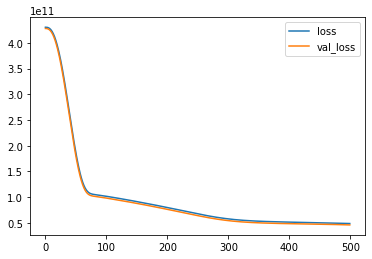

In [43]:
loss.plot()

Plot shows that our loss stabilizes around epoch = 300.

# Evaluate the model

We will first find out the mean absolute error.

In [44]:
from sklearn.metrics import mean_absolute_error, r2_score

Predict the price using the model we created using a X_test.

In [45]:
test_pred = model.predict(X_test) 

In [46]:
mean_absolute_error(y_test,test_pred)

133171.32541578315

MAE is the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. This shows that our prediction has average difference of $ 133171.33 from the actual price.

In [47]:
r2_score(y_test,test_pred)

0.6291026515034247

Our model has fair r2 score of 0.629.

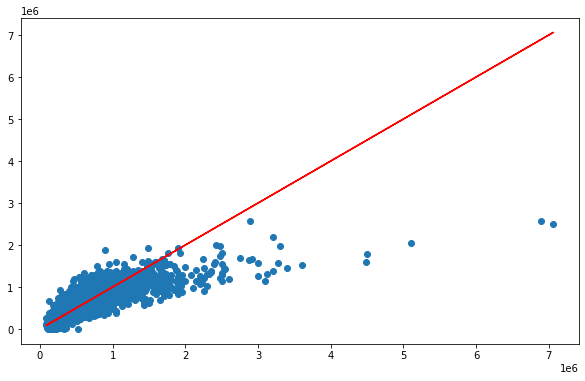

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, test_pred)
ax.plot(y_test,y_test,'r')

Plot shows that the there are outliers that does not follow the y_test line. Our scatter points are closely aligned with the linear line up to around 2e-6 to 3e-6.

# Just for fun

## Is more unit better?

Since I did not understand fully on choosing number of unit 

In [49]:
model = Sequential()
model.add(Input(shape = (16,))) 
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1))             
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train.values,
          validation_data=(X_val,y_val.values),
          epochs=500, batch_size=100)


Epoch 1/500
114/114 [==============================] - 0s 3ms/step - loss: 430345355264.0000 - val_loss: 427899420672.0000
Epoch 2/500
114/114 [==============================] - 0s 931us/step - loss: 430131871744.0000 - val_loss: 427424186368.0000
Epoch 3/500
114/114 [==============================] - 0s 922us/step - loss: 429204406272.0000 - val_loss: 425921314816.0000
Epoch 4/500
114/114 [==============================] - 0s 953us/step - loss: 426976411648.0000 - val_loss: 422835650560.0000
Epoch 5/500
114/114 [==============================] - 0s 1ms/step - loss: 422918127616.0000 - val_loss: 417682325504.0000
Epoch 6/500
114/114 [==============================] - 0s 1ms/step - loss: 416610680832.0000 - val_loss: 410109018112.0000
Epoch 7/500
114/114 [==============================] - 0s 896us/step - loss: 407729602560.0000 - val_loss: 399820029952.0000
Epoch 8/500
114/114 [==============================] - 0s 913us/step - loss: 396134678528.0000 - val_loss: 386787409920.0000
Epoch 

114/114 [==============================] - 0s 887us/step - loss: 90852204544.0000 - val_loss: 87183400960.0000
Epoch 65/500
114/114 [==============================] - 0s 904us/step - loss: 90331209728.0000 - val_loss: 86647873536.0000
Epoch 66/500
114/114 [==============================] - 0s 878us/step - loss: 89791545344.0000 - val_loss: 86114115584.0000
Epoch 67/500
114/114 [==============================] - 0s 913us/step - loss: 89255059456.0000 - val_loss: 85572386816.0000
Epoch 68/500
114/114 [==============================] - 0s 904us/step - loss: 88709038080.0000 - val_loss: 85030494208.0000
Epoch 69/500
114/114 [==============================] - 0s 948us/step - loss: 88160894976.0000 - val_loss: 84472258560.0000
Epoch 70/500
114/114 [==============================] - 0s 948us/step - loss: 87606411264.0000 - val_loss: 83918495744.0000
Epoch 71/500
114/114 [==============================] - 0s 887us/step - loss: 87054229504.0000 - val_loss: 83360899072.0000
Epoch 72/500
114/114 

Epoch 130/500
114/114 [==============================] - 0s 983us/step - loss: 55729393664.0000 - val_loss: 52340076544.0000
Epoch 131/500
114/114 [==============================] - 0s 1ms/step - loss: 55460683776.0000 - val_loss: 52093005824.0000
Epoch 132/500
114/114 [==============================] - 0s 878us/step - loss: 55228166144.0000 - val_loss: 51869245440.0000
Epoch 133/500
114/114 [==============================] - 0s 913us/step - loss: 54997409792.0000 - val_loss: 51651735552.0000
Epoch 134/500
114/114 [==============================] - 0s 948us/step - loss: 54792609792.0000 - val_loss: 51471908864.0000
Epoch 135/500
114/114 [==============================] - 0s 1ms/step - loss: 54587039744.0000 - val_loss: 51269668864.0000
Epoch 136/500
114/114 [==============================] - 0s 992us/step - loss: 54391476224.0000 - val_loss: 51084111872.0000
Epoch 137/500
114/114 [==============================] - 0s 922us/step - loss: 54204719104.0000 - val_loss: 50915282944.0000
Epoc

114/114 [==============================] - 0s 913us/step - loss: 48879321088.0000 - val_loss: 46105309184.0000
Epoch 196/500
114/114 [==============================] - 0s 887us/step - loss: 48822214656.0000 - val_loss: 46039904256.0000
Epoch 197/500
114/114 [==============================] - 0s 896us/step - loss: 48741167104.0000 - val_loss: 45984468992.0000
Epoch 198/500
114/114 [==============================] - 0s 913us/step - loss: 48666341376.0000 - val_loss: 45906821120.0000
Epoch 199/500
114/114 [==============================] - 0s 887us/step - loss: 48585162752.0000 - val_loss: 45836673024.0000
Epoch 200/500
114/114 [==============================] - 0s 904us/step - loss: 48513363968.0000 - val_loss: 45782147072.0000
Epoch 201/500
114/114 [==============================] - 0s 931us/step - loss: 48433246208.0000 - val_loss: 45720903680.0000
Epoch 202/500
114/114 [==============================] - 0s 904us/step - loss: 48366686208.0000 - val_loss: 45650853888.0000
Epoch 203/500


Epoch 261/500
114/114 [==============================] - 0s 904us/step - loss: 44343521280.0000 - val_loss: 42073690112.0000
Epoch 262/500
114/114 [==============================] - 0s 913us/step - loss: 44272214016.0000 - val_loss: 42028572672.0000
Epoch 263/500
114/114 [==============================] - 0s 2ms/step - loss: 44198744064.0000 - val_loss: 41950257152.0000
Epoch 264/500
114/114 [==============================] - 0s 966us/step - loss: 44130336768.0000 - val_loss: 41890942976.0000
Epoch 265/500
114/114 [==============================] - 0s 869us/step - loss: 44071473152.0000 - val_loss: 41829466112.0000
Epoch 266/500
114/114 [==============================] - 0s 878us/step - loss: 44011122688.0000 - val_loss: 41768103936.0000
Epoch 267/500
114/114 [==============================] - 0s 904us/step - loss: 43937607680.0000 - val_loss: 41713156096.0000
Epoch 268/500
114/114 [==============================] - 0s 896us/step - loss: 43880300544.0000 - val_loss: 41660133376.0000
Ep

114/114 [==============================] - 0s 904us/step - loss: 40892284928.0000 - val_loss: 39086379008.0000
Epoch 327/500
114/114 [==============================] - 0s 852us/step - loss: 40836816896.0000 - val_loss: 39054819328.0000
Epoch 328/500
114/114 [==============================] - 0s 896us/step - loss: 40788451328.0000 - val_loss: 39033159680.0000
Epoch 329/500
114/114 [==============================] - 0s 878us/step - loss: 40735780864.0000 - val_loss: 38973788160.0000
Epoch 330/500
114/114 [==============================] - 0s 887us/step - loss: 40686448640.0000 - val_loss: 38932373504.0000
Epoch 331/500
114/114 [==============================] - 0s 913us/step - loss: 40639483904.0000 - val_loss: 38881767424.0000
Epoch 332/500
114/114 [==============================] - 0s 900us/step - loss: 40595619840.0000 - val_loss: 38861778944.0000
Epoch 333/500
114/114 [==============================] - 0s 878us/step - loss: 40547454976.0000 - val_loss: 38827954176.0000
Epoch 334/500


Epoch 392/500
114/114 [==============================] - 0s 860us/step - loss: 38618722304.0000 - val_loss: 37378736128.0000
Epoch 393/500
114/114 [==============================] - 0s 878us/step - loss: 38597246976.0000 - val_loss: 37375660032.0000
Epoch 394/500
114/114 [==============================] - 0s 966us/step - loss: 38579195904.0000 - val_loss: 37357969408.0000
Epoch 395/500
114/114 [==============================] - 0s 1ms/step - loss: 38552657920.0000 - val_loss: 37331681280.0000
Epoch 396/500
114/114 [==============================] - 0s 931us/step - loss: 38525431808.0000 - val_loss: 37300400128.0000
Epoch 397/500
114/114 [==============================] - 0s 869us/step - loss: 38510325760.0000 - val_loss: 37301489664.0000
Epoch 398/500
114/114 [==============================] - 0s 869us/step - loss: 38488899584.0000 - val_loss: 37311762432.0000
Epoch 399/500
114/114 [==============================] - 0s 887us/step - loss: 38461751296.0000 - val_loss: 37250641920.0000
Ep

114/114 [==============================] - 0s 913us/step - loss: 37487591424.0000 - val_loss: 36566544384.0000
Epoch 458/500
114/114 [==============================] - 0s 896us/step - loss: 37481189376.0000 - val_loss: 36555055104.0000
Epoch 459/500
114/114 [==============================] - 0s 896us/step - loss: 37460398080.0000 - val_loss: 36556902400.0000
Epoch 460/500
114/114 [==============================] - 0s 904us/step - loss: 37450219520.0000 - val_loss: 36566700032.0000
Epoch 461/500
114/114 [==============================] - 0s 904us/step - loss: 37432913920.0000 - val_loss: 36542337024.0000
Epoch 462/500
114/114 [==============================] - 0s 869us/step - loss: 37416448000.0000 - val_loss: 36524728320.0000
Epoch 463/500
114/114 [==============================] - 0s 860us/step - loss: 37404372992.0000 - val_loss: 36517904384.0000
Epoch 464/500
114/114 [==============================] - 0s 904us/step - loss: 37396254720.0000 - val_loss: 36510294016.0000
Epoch 465/500


In [50]:
test_pred = model.predict(X_test) 
r2_score(y_test,test_pred)

0.7119090025111907

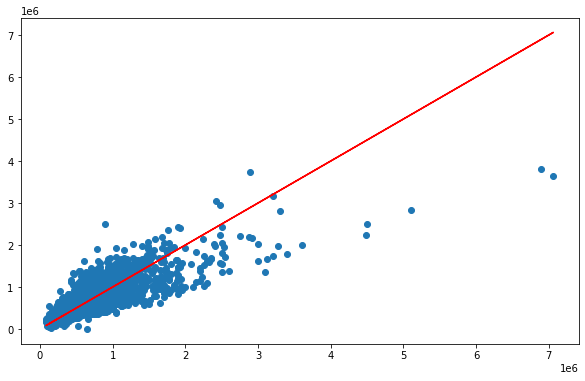

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, test_pred)
ax.plot(y_test,y_test,'r')

In [52]:
model = Sequential()
model.add(Input(shape = (16,))) 
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1))             
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train.values,
          validation_data=(X_val,y_val.values),
          epochs=500, batch_size=100)


Epoch 1/500
114/114 [==============================] - 0s 2ms/step - loss: 430311899136.0000 - val_loss: 427755438080.0000
Epoch 2/500
114/114 [==============================] - 0s 1ms/step - loss: 429480542208.0000 - val_loss: 425884155904.0000
Epoch 3/500
114/114 [==============================] - 0s 1ms/step - loss: 425842671616.0000 - val_loss: 420030447616.0000
Epoch 4/500
114/114 [==============================] - 0s 1ms/step - loss: 417258078208.0000 - val_loss: 408319295488.0000
Epoch 5/500
114/114 [==============================] - 0s 1ms/step - loss: 402239520768.0000 - val_loss: 389626167296.0000
Epoch 6/500
114/114 [==============================] - 0s 1ms/step - loss: 379972091904.0000 - val_loss: 363747311616.0000
Epoch 7/500
114/114 [==============================] - 0s 1ms/step - loss: 350630510592.0000 - val_loss: 330922917888.0000
Epoch 8/500
114/114 [==============================] - 0s 1ms/step - loss: 315392589824.0000 - val_loss: 293367119872.0000
Epoch 9/500
114/

Epoch 68/500
114/114 [==============================] - 0s 1ms/step - loss: 67941163008.0000 - val_loss: 64053780480.0000
Epoch 69/500
114/114 [==============================] - 0s 1ms/step - loss: 67006062592.0000 - val_loss: 63137726464.0000
Epoch 70/500
114/114 [==============================] - 0s 1ms/step - loss: 66107879424.0000 - val_loss: 62250262528.0000
Epoch 71/500
114/114 [==============================] - 0s 1ms/step - loss: 65227014144.0000 - val_loss: 61378990080.0000
Epoch 72/500
114/114 [==============================] - 0s 1ms/step - loss: 64370155520.0000 - val_loss: 60551823360.0000
Epoch 73/500
114/114 [==============================] - 0s 1ms/step - loss: 63532072960.0000 - val_loss: 59730034688.0000
Epoch 74/500
114/114 [==============================] - 0s 1ms/step - loss: 62724300800.0000 - val_loss: 58961940480.0000
Epoch 75/500
114/114 [==============================] - 0s 1ms/step - loss: 61969825792.0000 - val_loss: 58217447424.0000
Epoch 76/500
114/114 [==

Epoch 135/500
114/114 [==============================] - 0s 1ms/step - loss: 48252604416.0000 - val_loss: 45508743168.0000
Epoch 136/500
114/114 [==============================] - 0s 1ms/step - loss: 48139943936.0000 - val_loss: 45435297792.0000
Epoch 137/500
114/114 [==============================] - 0s 1ms/step - loss: 48004980736.0000 - val_loss: 45402927104.0000
Epoch 138/500
114/114 [==============================] - 0s 1ms/step - loss: 47894962176.0000 - val_loss: 45185662976.0000
Epoch 139/500
114/114 [==============================] - 0s 1ms/step - loss: 47761211392.0000 - val_loss: 45080264704.0000
Epoch 140/500
114/114 [==============================] - 0s 1ms/step - loss: 47641546752.0000 - val_loss: 44983136256.0000
Epoch 141/500
114/114 [==============================] - 0s 1ms/step - loss: 47508594688.0000 - val_loss: 44853579776.0000
Epoch 142/500
114/114 [==============================] - 0s 1ms/step - loss: 47373774848.0000 - val_loss: 44724203520.0000
Epoch 143/500
11

114/114 [==============================] - 0s 1ms/step - loss: 41134219264.0000 - val_loss: 39302164480.0000
Epoch 202/500
114/114 [==============================] - 0s 1ms/step - loss: 41102016512.0000 - val_loss: 39274758144.0000
Epoch 203/500
114/114 [==============================] - 0s 1ms/step - loss: 40997609472.0000 - val_loss: 39174504448.0000
Epoch 204/500
114/114 [==============================] - 0s 1ms/step - loss: 40936669184.0000 - val_loss: 39143460864.0000
Epoch 205/500
114/114 [==============================] - 0s 1ms/step - loss: 40865161216.0000 - val_loss: 39076044800.0000
Epoch 206/500
114/114 [==============================] - 0s 1ms/step - loss: 40799772672.0000 - val_loss: 39047307264.0000
Epoch 207/500
114/114 [==============================] - 0s 1ms/step - loss: 40746430464.0000 - val_loss: 38991585280.0000
Epoch 208/500
114/114 [==============================] - 0s 1ms/step - loss: 40706076672.0000 - val_loss: 38923173888.0000
Epoch 209/500
114/114 [=======

114/114 [==============================] - 0s 1ms/step - loss: 38233792512.0000 - val_loss: 37099245568.0000
Epoch 268/500
114/114 [==============================] - 0s 1ms/step - loss: 38166712320.0000 - val_loss: 37063385088.0000
Epoch 269/500
114/114 [==============================] - 0s 1ms/step - loss: 38152638464.0000 - val_loss: 37036331008.0000
Epoch 270/500
114/114 [==============================] - 0s 1ms/step - loss: 38114234368.0000 - val_loss: 37037301760.0000
Epoch 271/500
114/114 [==============================] - 0s 1ms/step - loss: 38096986112.0000 - val_loss: 37017325568.0000
Epoch 272/500
114/114 [==============================] - 0s 1ms/step - loss: 38080155648.0000 - val_loss: 36999454720.0000
Epoch 273/500
114/114 [==============================] - 0s 1ms/step - loss: 38052585472.0000 - val_loss: 36955652096.0000
Epoch 274/500
114/114 [==============================] - 0s 1ms/step - loss: 38029627392.0000 - val_loss: 36984520704.0000
Epoch 275/500
114/114 [=======

114/114 [==============================] - 0s 1ms/step - loss: 36836696064.0000 - val_loss: 36042293248.0000
Epoch 334/500
114/114 [==============================] - 0s 1ms/step - loss: 36827385856.0000 - val_loss: 36054298624.0000
Epoch 335/500
114/114 [==============================] - 0s 1ms/step - loss: 36804378624.0000 - val_loss: 36013166592.0000
Epoch 336/500
114/114 [==============================] - 0s 1ms/step - loss: 36804710400.0000 - val_loss: 35993628672.0000
Epoch 337/500
114/114 [==============================] - 0s 1ms/step - loss: 36791267328.0000 - val_loss: 35993452544.0000
Epoch 338/500
114/114 [==============================] - 0s 1ms/step - loss: 36765691904.0000 - val_loss: 36017029120.0000
Epoch 339/500
114/114 [==============================] - 0s 1ms/step - loss: 36776165376.0000 - val_loss: 35981598720.0000
Epoch 340/500
114/114 [==============================] - 0s 1ms/step - loss: 36737327104.0000 - val_loss: 36005265408.0000
Epoch 341/500
114/114 [=======

114/114 [==============================] - 0s 1ms/step - loss: 35983847424.0000 - val_loss: 35326926848.0000
Epoch 400/500
114/114 [==============================] - 0s 1ms/step - loss: 35978493952.0000 - val_loss: 35284365312.0000
Epoch 401/500
114/114 [==============================] - 0s 1ms/step - loss: 35973316608.0000 - val_loss: 35279052800.0000
Epoch 402/500
114/114 [==============================] - 0s 1ms/step - loss: 35949436928.0000 - val_loss: 35263229952.0000
Epoch 403/500
114/114 [==============================] - 0s 1ms/step - loss: 35942903808.0000 - val_loss: 35267121152.0000
Epoch 404/500
114/114 [==============================] - 0s 1ms/step - loss: 35932565504.0000 - val_loss: 35288571904.0000
Epoch 405/500
114/114 [==============================] - 0s 1ms/step - loss: 35922804736.0000 - val_loss: 35258843136.0000
Epoch 406/500
114/114 [==============================] - 0s 1ms/step - loss: 35910610944.0000 - val_loss: 35226812416.0000
Epoch 407/500
114/114 [=======

114/114 [==============================] - 0s 1ms/step - loss: 35348287488.0000 - val_loss: 34717233152.0000
Epoch 466/500
114/114 [==============================] - 0s 1ms/step - loss: 35347062784.0000 - val_loss: 34737979392.0000
Epoch 467/500
114/114 [==============================] - 0s 1ms/step - loss: 35342532608.0000 - val_loss: 34716356608.0000
Epoch 468/500
114/114 [==============================] - 0s 1ms/step - loss: 35339116544.0000 - val_loss: 34684272640.0000
Epoch 469/500
114/114 [==============================] - 0s 1ms/step - loss: 35325845504.0000 - val_loss: 34725781504.0000
Epoch 470/500
114/114 [==============================] - 0s 1ms/step - loss: 35327229952.0000 - val_loss: 34721009664.0000
Epoch 471/500
114/114 [==============================] - 0s 1ms/step - loss: 35317645312.0000 - val_loss: 34725326848.0000
Epoch 472/500
114/114 [==============================] - 0s 1ms/step - loss: 35310546944.0000 - val_loss: 34648338432.0000
Epoch 473/500
114/114 [=======

In [53]:
test_pred = model.predict(X_test) 
r2_score(y_test,test_pred)

0.7244856442096482

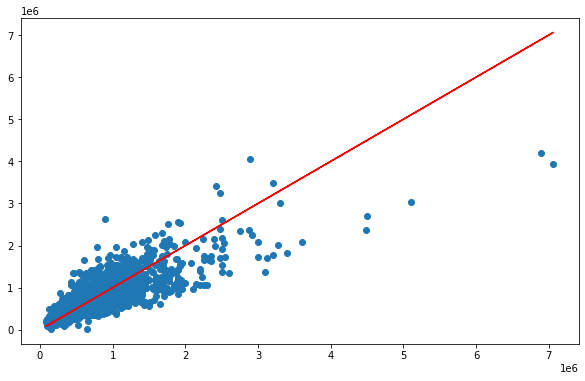

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, test_pred)
ax.plot(y_test,y_test,'r')

Result shows that as the number of unit increases the r2 score increases and the scatter points are more aligned with the y_test line.